In [123]:
# Importa as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [124]:
# Lê os arquivos CSV
df_train = pd.read_csv('train.csv', sep=',', encoding='UTF8')
df_test = pd.read_csv('test.csv', sep=',', encoding='UTF8')
df_answer = pd.DataFrame()

In [125]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [126]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [127]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [128]:
# Verifica a correlação
corr = df_train.corr()['NU_NOTA_MT'].dropna().sort_values(ascending=False)
print(corr.head(10))

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP2             0.335638
Name: NU_NOTA_MT, dtype: float64


In [129]:
# Define as features a serem usadas no modelo
features_train = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'TP_DEPENDENCIA_ADM_ESC',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_test = [
    'NU_INSCRICAO',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'TP_DEPENDENCIA_ADM_ESC',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [130]:
# Verifica a existência de missings nas variáveis 
df_train[features_train].isna().sum()

NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_REDACAO           3597
TP_DEPENDENCIA_ADM_ESC    9448
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
dtype: int64

In [131]:
features_train.remove('TP_DEPENDENCIA_ADM_ESC')
features_test.remove('TP_DEPENDENCIA_ADM_ESC')

In [132]:
print(features_train, features_test)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'] ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']


In [133]:
# Adiciona a variável dependente na lista de features
features_train.append('NU_NOTA_MT')
print(features_train)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_MT']


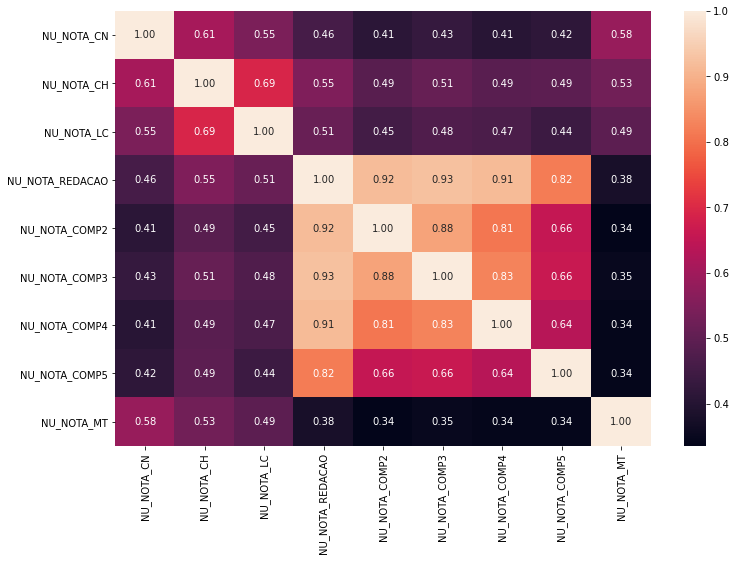

In [134]:
corr = df_train[features_train].corr()

%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr,  annot=True, fmt='.2f') #Gera um heatmap para facilitar a visualização da correlação
plt.xticks(rotation=90)
plt.show()

In [135]:
#Exclui os missings nos dados de treino
df_train2 = df_train[features_train].dropna()

In [136]:
# Verifica a existência de missings nos dados de treino
df_train2.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_MT         0
dtype: int64

In [137]:
#Exclui os missings nos dados de teste
df_test2 = df_test[features_test].dropna()

In [138]:
#Verifica os missings nos dados de teste
df_test2.isna().sum()

NU_INSCRICAO       0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [139]:
df_answer['NU_INSCRICAO'] = df_test2['NU_INSCRICAO']
df_answer.head()

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
4,715494628a50142ce8cb17191cfe6d0f3cae0934
5,e656d6bad65c93fb2880f1eba5037008c8e75774


In [155]:
#Determina a variável dependente e as explicativas
y_train = df_train2['NU_NOTA_MT']
df_train3 = df_train2.drop(columns='NU_NOTA_MT')
X_train = df_train3
df_test3 = df_test2.drop(columns='NU_INSCRICAO')
X_test = df_test3

In [157]:
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('LR', LinearRegression())])

In [158]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [159]:
y_pred = pipeline.predict(X_test)

In [160]:
acuracia = pipeline.score(X_test, y_pred)
acuracia

1.0

In [161]:
df_answer['NU_NOTA_MT'] = np.around(y_pred,2)

In [162]:
df_answer.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.41
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,437.11
2,b38a03232f43b11c9d0788abaf060f7366053b6d,590.54
4,715494628a50142ce8cb17191cfe6d0f3cae0934,542.51
5,e656d6bad65c93fb2880f1eba5037008c8e75774,466.06
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,539.50
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,439.07
8,043c544a2104aa8a9849f1a703a08d37a2f16839,475.16
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,466.60
12,940aede382ccb332fab15d413217695ec44ca765,454.23


In [163]:
df_answer.to_csv('answer.csv', index=False, header=True)